In [7]:
import numpy as np
import pandas as pd
from itertools import product
import csv
import numpy as np
 
start_value1= 5e-06
end_value1 = 7e-04

# particle_diameter_1 = 1e-4
# particle_diameter_2 = 3e-7

start_value2 = 2e-7
end_value2 = 9e-7

column_header =['particle_diameter_1', 'particle_diameter_2']
interval_1 = (end_value1-start_value1)/20
print(interval_1)
error_K_1 = interval_1**2/150*(0.001)/(1-0.1)**2
print('error_K_1 =', error_K_1)
interval_2 = (end_value2-start_value2)/20
print(interval_2)  
error_K_2 = interval_2/1.75*0.001/(1-0.1)
print('error K_2 =', error_K_2)

array1 = np.linspace(start_value1, end_value1, 20) 
array2 = np.linspace(start_value2, end_value2, 20)

combinations = list(product(array1, array2))
 
# Create a DataFrame using pandas
df = pd.DataFrame(combinations, columns=column_header)

# Save the DataFrame to a CSV file
csv_file_path = 'combinations.csv'
df.to_csv(csv_file_path, index=False)

print(df)



3.475e-05
error_K_1 = 9.93878600823045e-15
3.4999999999999996e-08
error K_2 = 2.222222222222222e-11
     particle_diameter_1  particle_diameter_2
0               0.000005         2.000000e-07
1               0.000005         2.368421e-07
2               0.000005         2.736842e-07
3               0.000005         3.105263e-07
4               0.000005         3.473684e-07
..                   ...                  ...
395             0.000700         7.526316e-07
396             0.000700         7.894737e-07
397             0.000700         8.263158e-07
398             0.000700         8.631579e-07
399             0.000700         9.000000e-07

[400 rows x 2 columns]


In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1', 'particle_diameter_2']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

 
# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in)
md_df = md_df.T
md_df *= 1e-6
md_df = md_df.drop(509)
md_df = md_df.drop(508)
md_df = md_df.drop(507)
md_df = md_df.drop(506)
md_df = md_df.drop(505)
md_df = md_df.drop(504)
md_df = md_df.drop(503)
md_df = md_df.drop(502)
md_df = md_df.drop(501)


# Define the name of the column to be used as the new index
new_index_column = t_header

# Set the new index using the specified column
md_df.set_index(new_index_column, inplace=True)

print('Modeling Results')
md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0.0,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
0.1,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,26.763069,-33.943101,6.113352,36.211232,-878.017219,11.476537,20.873359,7.767694,7.002980,16.122292
0.2,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,6.998878,6.998661,6.987396,6.998239,6.998035,7.002906,7.002901,7.001447,6.942255,7.002967
0.3,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,6.980569,6.979482,6.923323,6.977387,6.976375,7.002450,7.002421,6.994298,6.851363,7.002846
0.4,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,6.915464,6.911657,6.836303,6.904381,6.900896,7.000426,7.000310,6.967834,6.737965,7.002240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,6.631940,6.631383,6.630975,6.630663,6.630417,6.630217,6.630053,6.629915,6.629797,6.629696,...,0.101641,0.101602,0.101592,0.101626,0.101644,0.101607,0.101640,0.101631,0.101644,0.101616
49.7,6.630952,6.630394,6.629985,6.629672,6.629425,6.629226,6.629061,6.628923,6.628805,6.628703,...,0.101641,0.101602,0.101592,0.101626,0.101644,0.101607,0.101640,0.101631,0.101644,0.101616
49.8,6.629963,6.629404,6.628994,6.628681,6.628435,6.628235,6.628070,6.627931,6.627813,6.627711,...,0.101641,0.101602,0.101592,0.101626,0.101644,0.101607,0.101640,0.101631,0.101644,0.101616
49.9,6.628975,6.628415,6.628004,6.627691,6.627444,6.627244,6.627078,6.626939,6.626821,6.626719,...,0.101641,0.101602,0.101592,0.101626,0.101644,0.101607,0.101640,0.101631,0.101644,0.101616


(0.0, 7.5)

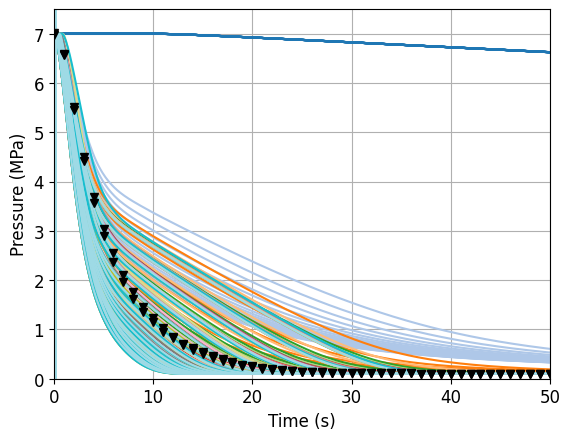

In [9]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
data20 = pd.read_csv('CT1.csv')
plt.plot(data20['time'], data20['CT1_1000_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_1000_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 7.5)



In [11]:


# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_1000_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')

minimum_ARMSE = min(ARMSE)
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)
print('Minimum ARMSE: ' + str(minimum_ARMSE))

K_1 =  1.900457120708923e-12
K_2 =  2.439431913116124e-10
Minimum ARMSE: 0.1516140260346594


In [ ]:
# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_1000_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


parameters = pd.read_csv('combinations.csv')


minimum_ARMSE = min(ARMSE)
min_index_1 = np.argmin(ARMSE)
selected_row = parameters.iloc[min_index_1]
K_1 = selected_row['particle_diameter_1']**2/150*0.001/(1-0.1)**2
print("K_1 = ", K_1)
K_2 = selected_row['particle_diameter_2']/1.75*0.001/(1-0.1)
print("K_2 = ", K_2)
print('Minimum ARMSE: ' + str(minimum_ARMSE))

K_1 =  2.8675769182536915e-12
K_2 =  2.673350041771094e-10
Minimum ARMSE: 0.14864340526876163


(0.0, 7.5)

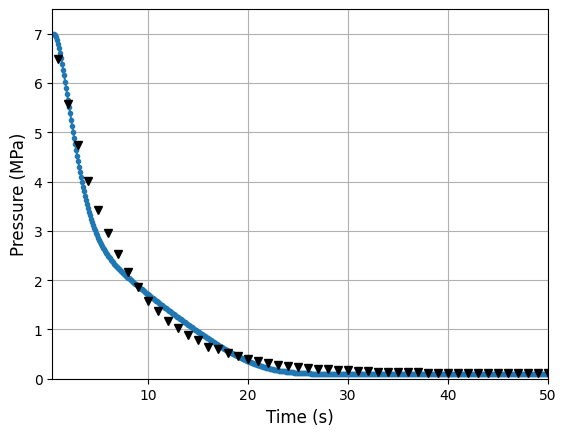

In [ ]:
# Plot all pressure decays
# md_df[min_index_1].plot(marker = '.')
md_df[min_index_2].plot(marker = '.')
# plt.plot(data20['time'], data20['TT1_1000_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['TT1_1000_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12) 
plt.grid()
plt.xlim(0.4, 50)
plt.ylim(0, 7.5)